## **Bibliotecas**

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from scipy import stats

acoes = ['CPLE6.SA', "WEGE3.SA", "FLRY3.SA", "PSSA3.SA", "^BVSP",
                       "VALE3.SA"]

acoes_df = yf.download(acoes, start='2015-01-01')["Adj Close"]

[*********************100%%**********************]  6 of 6 completed


In [ ]:
acoes_df

In [ ]:
acoes_df.info()

## **Visualizar tabela**

In [ ]:
acoes_df.head()
acoes_df.tail()
acoes_df.describe()

Price     Adj Close                                                      \
Ticker     BBDC4.SA     CPLE6.SA     FLRY3.SA     PRIO3.SA     PSSA3.SA   
count   2347.000000  2347.000000  2347.000000  2347.000000  2347.000000   
mean      14.553182     3.971621    15.912710    12.945414    18.250814   
std        4.003944     2.577893     5.350259    15.621392     6.124777   
min        5.507010     0.944294     4.549949     0.137779     7.540622   
25%       12.033074     1.679746    13.617475     0.741409    11.680775   
50%       14.606103     3.292699    16.104841     3.634163    19.908102   
75%       17.334237     5.899611    20.444364    23.522219    22.611475   
max       23.168978    10.359822    26.997272    50.860001    31.505445   

Price                                   Close                            ...  \
Ticker     VALE3.SA     WEGE3.SA     BBDC4.SA     CPLE6.SA     FLRY3.SA  ...   
count   2347.000000  2347.000000  2347.000000  2347.000000  2347.000000  ...   
mean      40.373473    19.116725    18.035766     5.144375    18.721851  ...   
std       24.145988    13.468864     4.531798     2.314341     6.219208  ...   
min        5.136929     4.318591     8.001417     1.774501     6.365166  ...   
25%       18.384744     6.462856    14.672220     2.985161    14.750000  ...   
50%       33.899822    11.137151    17.468069     5.031586    18.661724  ...   
75%       63.643827    33.571211    20.805785     6.960545    24.230066  ...   
max       88.224312    43.637676    29.609316    10.410000    31.590086  ...   

Price          Open                                  Volume                \
Ticker     PSSA3.SA     VALE3.SA     WEGE3.SA      BBDC4.SA      CPLE6.SA   
count   2347.000000  2347.000000  2347.000000  2.347000e+03  2.347000e+03   
mean      22.195690    53.261977    20.059257  3.360362e+07  1.053329e+07   
std        5.399627    26.539308    13.645219  2.445745e+07  8.176918e+06   
min       11.400000     8.750000     5.026923  0.000000e+00  0.000000e+00   
25%       17.667500    30.080000     7.263461  1.893785e+07  6.087709e+06   
50%       22.969999    52.070000    11.865000  2.798320e+07  8.977520e+06   
75%       26.797500    70.445000    34.754999  4.165142e+07  1.313555e+07   
max       33.750000   119.800003    46.459999  4.991948e+08  1.550016e+08   

Price                                                                         
Ticker      FLRY3.SA      PRIO3.SA      PSSA3.SA      VALE3.SA      WEGE3.SA  
count   2.347000e+03  2.347000e+03  2.347000e+03  2.347000e+03  2.347000e+03  
mean    1.984581e+06  9.837464e+06  1.640281e+06  1.994905e+07  7.083418e+06  
std     1.780669e+06  1.074529e+07  1.240261e+06  1.362593e+07  4.338030e+06  
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%     1.093652e+06  1.792500e+06  9.787000e+05  9.831650e+06  4.415970e+06  
50%     1.722610e+06  6.620000e+06  1.392600e+06  1.857920e+07  6.041620e+06  
75%     2.512576e+06  1.415195e+07  2.034100e+06  2.660340e+07  8.632350e+06  
max     5.491270e+07  1.619380e+08  3.858520e+07  1.835345e+08  4.393400e+07  

[8 rows x 42 columns]

## **Procurar por preço**

In [ ]:
acoes_df[acoes_df["High"] >= 90]
acoes_df[acoes_df["Close"] <= 1.78]

Price      Adj Close                                                         \
Ticker      BBDC4.SA CPLE6.SA FLRY3.SA  PRIO3.SA PSSA3.SA VALE3.SA WEGE3.SA   
Date                                                                          
2015-01-02       NaN      NaN      NaN  0.439294      NaN      NaN      NaN   
2015-01-05       NaN      NaN      NaN  0.406347      NaN      NaN      NaN   
2015-01-06       NaN      NaN      NaN  0.366411      NaN      NaN      NaN   
2015-01-07       NaN      NaN      NaN  0.365413      NaN      NaN      NaN   
2015-01-08       NaN      NaN      NaN  0.377394      NaN      NaN      NaN   
...              ...      ...      ...       ...      ...      ...      ...   
2024-06-05       NaN      NaN      NaN       NaN      NaN      NaN      NaN   
2024-06-06       NaN      NaN      NaN       NaN      NaN      NaN      NaN   
2024-06-07       NaN      NaN      NaN       NaN      NaN      NaN      NaN   
2024-06-10       NaN      NaN      NaN       NaN      NaN      NaN      NaN   
2024-06-11       NaN      NaN      NaN       NaN      NaN      NaN      NaN   

Price         Close                    ...     Open                    \
Ticker     BBDC4.SA CPLE6.SA FLRY3.SA  ... PSSA3.SA VALE3.SA WEGE3.SA   
Date                                   ...                              
2015-01-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-01-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-01-06      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-01-07      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2015-01-08      NaN      NaN      NaN  ...      NaN      NaN      NaN   
...             ...      ...      ...  ...      ...      ...      ...   
2024-06-05      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2024-06-06      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2024-06-07      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2024-06-10      NaN      NaN      NaN  ...      NaN      NaN      NaN   
2024-06-11      NaN      NaN      NaN  ...      NaN      NaN      NaN   

Price        Volume                                                          
Ticker     BBDC4.SA CPLE6.SA FLRY3.SA   PRIO3.SA PSSA3.SA VALE3.SA WEGE3.SA  
Date                                                                         
2015-01-02      NaN      NaN      NaN   840000.0      NaN      NaN      NaN  
2015-01-05      NaN      NaN      NaN  1912000.0      NaN      NaN      NaN  
2015-01-06      NaN      NaN      NaN  2154000.0      NaN      NaN      NaN  
2015-01-07      NaN      NaN      NaN  1501000.0      NaN      NaN      NaN  
2015-01-08      NaN      NaN      NaN  1622000.0      NaN      NaN      NaN  
...             ...      ...      ...        ...      ...      ...      ...  
2024-06-05      NaN      NaN      NaN        NaN      NaN      NaN      NaN  
2024-06-06      NaN      NaN      NaN        NaN      NaN      NaN      NaN  
2024-06-07      NaN      NaN      NaN        NaN      NaN      NaN      NaN  
2024-06-10      NaN      NaN      NaN        NaN      NaN      NaN      NaN  
2024-06-11      NaN      NaN      NaN        NaN      NaN      NaN      NaN  

[2347 rows x 42 columns]

## **CSV**

In [ ]:
acoes_df.to_csv("cple6_df.csv")
acoes_df = pd.read_csv("/content/cple6_df.csv")

## **NA's**

In [ ]:
acoes_df.isnull().sum
acoes_df.shape
acoes_df.dropna(inplace=True)
acoes_df.shape
acoes_df.isnull().sum()

## **Visualizar Dados**

In [ ]:
sns.histplot(acoes_df['Adj Close'], bins = 100);
sns.boxplot(x = acoes_df["Adj Close"])

In [ ]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(8, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [ ]:
acoes_df = acoes_df.reset_index()
acoes_df.plot(x = "Date", y = "Adj Close",figsize = (15, 7), title = "Histórico do preço das ações");

In [ ]:
acoes_df = acoes_df.reset_index()
figura = px.line(title = "Histórico de preço das ações")
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df["Date"], y = acoes_df[i], name = i)
figura.show

## **Visualizar Retorno**

**Simples**

In [ ]:
acoes_df["CPLE6.SA"][0], acoes_df["CPLE6.SA"][len(acoes_df) - 1]

(1.7499475479125977, 9.100000381469727)

In [ ]:
((acoes_df["CPLE6.SA"][len(acoes_df)-1] - acoes_df["CPLE6.SA"][0]) / acoes_df["CPLE6.SA"][0]) * 100

420.01560802919744

In [ ]:
((acoes_df["WEGE3.SA"][len(acoes_df)-1] - acoes_df["WEGE3.SA"][0]) / acoes_df["WEGE3.SA"][0]) * 100

640.1788051085007

In [ ]:
((acoes_df["PSSA3.SA"][len(acoes_df)-1] - acoes_df["PSSA3.SA"][0]) / acoes_df["PSSA3.SA"][0]) * 100

In [ ]:
acoes_df["RS CPLE"] = (acoes_df["CPLE6.SA"] / acoes_df["CPLE6.SA"].shift(1) - 1)
acoes_df["RS IBOV"] = (acoes_df["^BVSP"] / acoes_df["^BVSP"].shift(1) - 1)
acoes_df["RS WEGE"] = (acoes_df["WEGE3.SA"] / acoes_df["WEGE3.SA"].shift(1) - 1)
acoes_df["RS FLRY"] = (acoes_df["FLRY3.SA"] / acoes_df["FLRY3.SA"].shift(1) - 1)
acoes_df["RS PSSA"] = (acoes_df["PSSA3.SA"] / acoes_df["PSSA3.SA"].shift(1) - 1)
acoes_df["RS PRIO"] = (acoes_df["PRIO3.SA"] / acoes_df["PRIO3.SA"].shift(1) - 1)
acoes_df["RS VALE"] = (acoes_df["VALE3.SA"] / acoes_df["VALE3.SA"].shift(1) - 1)

In [ ]:
acoes_df

<Axes: xlabel='Date'>

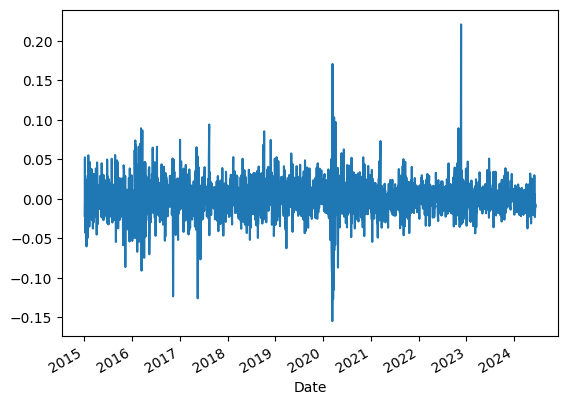

In [ ]:
acoes_df["RS CPLE"].plot()

In [ ]:
acoes_df["RS CPLE"].mean()

0.0009712095063902504

In [ ]:
(acoes_df["RS CPLE"].mean() * 246) * 100

23.89175385720016

In [ ]:
acoes_df["RS IBOV"].mean()

0.00048188212875695073

In [ ]:
(acoes_df["RS IBOV"].mean() * 246) *100


11.854300367420988

In [ ]:
(acoes_df["RS WEGE"].mean() * 246) *100

26.635929515154324

In [ ]:
(acoes_df["RS FLRY"].mean() * 246) *100

15.419995119479196

In [ ]:
(acoes_df["RS PSSA"].mean() * 246) *100

16.308685288247958

In [ ]:
(acoes_df["RS PRIO"].mean() * 246) *100

72.1226214896867

In [ ]:
(acoes_df["RS VALE"].mean() * 246) *100

26.579629181070523

**Logarítmica**

In [ ]:
acoes_df["CPLE6.SA"][0], acoes_df["CPLE6.SA"][len(acoes_df) - 1]

(1.749947428703308, 9.220000267028809)

In [ ]:
np.log(acoes_df["CPLE6.SA"][len(acoes_df) - 1] / acoes_df["CPLE6.SA"][0]) * 100

166.1789319787188

In [ ]:
np.log(acoes_df["WEGE3.SA"][len(acoes_df) - 1] / acoes_df["WEGE3.SA"][0]) * 100

202.11447446553947

In [ ]:
np.log(acoes_df["PSSA3.SA"][len(acoes_df) - 1] / acoes_df["PSSA3.SA"][0]) * 100

110.8887267813103

In [ ]:
acoes_df["RL CPLE"] = np.log(acoes_df["CPLE6.SA"] / acoes_df["CPLE6.SA"].shift(1))
acoes_df

In [ ]:
acoes_df["RL CPLE"].mean()

0.00070835009368593

In [ ]:
(acoes_df["RL CPLE"].mean() * 246)*100

17.425412304673877

In [ ]:
acoes_normalizado = acoes_df.copy()
for i in acoes_normalizado.columns[1:]:
  acoes_normalizado[i] = (acoes_normalizado[i] / acoes_normalizado[i][0])

In [ ]:
acoes_normalizado

In [ ]:
acoes_normalizado = acoes_normalizado.reset_index()
acoes_normalizado.drop(labels=["Date"], axis=1, inplace=True)
acoes_normalizado

In [ ]:
retorno_carteira = (acoes_normalizado / acoes_normalizado.shift(1)) - 1
retorno_anual = retorno_carteira.mean() * 246
retorno_anual

In [ ]:
pesos_carteira = np.array([0.1667, 0.16666, 0.16666, 0.16666, 0.16666, 0.16666])
pesos_carteira.sum()
np.dot(retorno_anual, pesos_carteira)

**Carteira x IBOV**

In [ ]:
 acoes_normalizado = acoes_normalizado.reset_index()
 acoes_normalizado["Carteira"] = (acoes_normalizado["CPLE6.SA"] + acoes_normalizado["WEGE3.SA"] + acoes_normalizado["PSSA3.SA"] + acoes_normalizado["FLRY3.SA"] + acoes_normalizado["VALE3.SA"] + acoes_normalizado["CPLE6.SA"] + acoes_normalizado["^BVSP"]) / 6

In [ ]:
figura = px.line(title = "Carteira x IBOV")
for i in acoes_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_normalizado["Date"], y = acoes_normalizado[i], name = i)
  figura.show()

## **Risco**

In [ ]:
acoes_df = acoes_df.reset_index()
acoes_df["CPLE6.SA"][acoes_df["Date"] == "2015-01-02"], acoes_df["CPLE6.SA"][acoes_df["Date"] == "2015-12-30"]

## **Modelo CAPM**

In [ ]:
acoes_df = acoes_df.reset_index()
acoes_df.drop(labels =["Date"], axis = 1, inplace = True)
acoes_df

In [ ]:
acoes_normalizado = acoes_df.copy()
for i in acoes_df.columns:
  acoes_normalizado[i] = acoes_df[i] / acoes_df[i][0]

acoes_normalizado

In [ ]:
acoes_df_taxaretorno = (acoes_normalizado / acoes_normalizado.shift(1)) - 1
acoes_df_taxaretorno.fillna(0, inplace = True)
acoes_df_taxaretorno.mean() * 246

In [ ]:
figura = px.scatter(acoes_df_taxaretorno, x = "^BVSP", y = "WEGE3.SA")
figura.show()

**Encontrando os betas**

In [37]:
beta_wege, alpha = np.polyfit(x = acoes_df_taxaretorno["^BVSP"], y = acoes_df_taxaretorno["WEGE3.SA"], deg = 1)
print("beta:", beta_wege, "alpha:", alpha)

beta: 0.7060311040563506 alpha: 0.0007592338927719869


In [38]:
beta_flry, alpha1 = np.polyfit(x = acoes_df_taxaretorno["^BVSP"], y = acoes_df_taxaretorno["FLRY3.SA"], deg = 1)
print("beta:", beta_flry, "alpha:", alpha1)

beta: 0.6630806768480029 alpha: 0.0003017899386566708


In [39]:
beta_cple, alpha2 = np.polyfit(x = acoes_df_taxaretorno["^BVSP"], y = acoes_df_taxaretorno["CPLE6.SA"], deg = 1)
print("beta:", beta_cple, "alpha:", alpha2)

beta: 0.9615380842090321 alpha: 0.0005128378947274824


In [40]:
beta_pssa, alpha3 = np.polyfit(x = acoes_df_taxaretorno["^BVSP"], y = acoes_df_taxaretorno["PSSA3.SA"], deg = 1)
print("beta:", beta_pssa, "alpha:", alpha3)

beta: 0.5621183425946544 alpha: 0.00038889612254010893


In [41]:
beta_vale, alpha4 = np.polyfit(x = acoes_df_taxaretorno["^BVSP"], y = acoes_df_taxaretorno["VALE3.SA"], deg = 1)
print("beta:", beta_vale, "alpha:", alpha4)

beta: 1.0650910101085427 alpha: 0.0005728619678279516


**Fazendo gráfico**

In [ ]:
figura = px.scatter(acoes_df_taxaretorno, x = "^BVSP", y = "WEGE3.SA")
figura.add_scatter(x = acoes_df_taxaretorno["^BVSP"], y = beta_wege * acoes_df_taxaretorno["^BVSP"] + alpha)
figura.show()

In [ ]:
figura1 = px.scatter(acoes_df_taxaretorno, x = "^BVSP", y = "FLRY3.SA")
figura1.add_scatter(x = acoes_df_taxaretorno["^BVSP"], y = beta_flry * acoes_df_taxaretorno["^BVSP"] + alpha1)
figura1.show()

**Cálculo do CAPM**

In [ ]:
rm = acoes_df_taxaretorno["^BVSP"].mean() * 246
rm

In [ ]:
acoes_df_taxaretorno

In [ ]:
taxa_selic_historica = np.array([13.37, 14.08, 10.08, 6.49, 5.94, 2.79, 4.42, 12.43, 13.2, 11])
rf = taxa_selic_historica.mean() / 100
rf

In [36]:
capm_wege = rf + (beta_wege * (rm - rf))
capm_wege

0.11002583271479836

**Alfa e Beta automatizado**

In [ ]:
betas = []
alphas = []
for ativo in acoes_df_taxaretorno.columns[2:7]:
  beta, alpha = np.polyfit(acoes_df_taxaretorno["^BVSP"], acoes_df_taxaretorno[ativo], 1)
  betas.append(beta)
  alphas.append(alpha)
betas

In [52]:
def visualiza_alfa_beta(betas, alphas):
  for i, ativo in enumerate(acoes_df_taxaretorno.columns[2:7]):
    print(ativo, "beta:", betas[i], "alpha:", alphas[i] * 100)
visualiza_alfa_beta(betas, alphas)

CPLE6.SA beta: 0.9615380842090321 alpha: 0.05128378947274823
FLRY3.SA beta: 0.6630806768480029 alpha: 0.030178993865667077
PSSA3.SA beta: 0.5621183425946544 alpha: 0.03888961225401089
VALE3.SA beta: 1.0650910101085427 alpha: 0.05728619678279516
WEGE3.SA beta: 0.7060311040563506 alpha: 0.07592338927719869


In [53]:
np.array(alphas).mean() * 100

0.050712396330484015

**CAPM Carteira**

In [56]:
capm_carteira = []
for i, ativo in enumerate(acoes_df_taxaretorno.columns[2:7]):
  capm_carteira.append(rf + (betas[i] * (rm - rf)))
capm_carteira

[0.1158978311205369,
 0.1090387565889622,
 0.10671846512208705,
 0.1182776589257426,
 0.11002583271479836]

In [60]:
def visualiza_carteira(capm):
  for i, ativo in enumerate(acoes_df_taxaretorno.columns[2:7]):
    print(ativo, "CAPM", capm[i] * 100)
visualiza_carteira(capm_carteira)

CPLE6.SA CAPM 11.589783112053691
FLRY3.SA CAPM 10.90387565889622
PSSA3.SA CAPM 10.671846512208704
VALE3.SA CAPM 11.82776589257426
WEGE3.SA CAPM 11.002583271479836


In [64]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) * 100
capm_portfolio = np.sum(capm_carteira * pesos)
capm_portfolio

11.199170889442541